### **Setup & Imports**
##### By importing various libraries from Python, we are able to do various manipulation of date such as converting files from JSON to CSV, using seaborn, matplotlib, and statsmodels to visulalize data and verify hypothesis.

# **Trend Setters - Data Science with Spotify**
##### By: Daya Novich and Naomi Rosenbaum

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import warnings
import json
import csv

### **Data Processing**
##### We first start by creating a JSON file of the gathered information on top spotify songs, we created a JSON file using Firebase.Then we converted it into a CSV file, allowing us to then create our first dataframe.
##### For each song we list the Title, Artist, Duration (in seconds), if its Explicit, Genre, and Streams (in millions) number at time of data collection.

In [11]:
with open('spotifyDB.json') as json_file:
    data = json.load(json_file)


titles = data['Songs']

data_file = open('spotifyDB.csv', 'w')
csv_writer = csv.writer(data_file)
csv_writer.writerow(titles[0].keys())
for title in titles:
    csv_writer.writerow(title.values())
data_file.close()



### **Data Integration**


##### After converting our original dataset to a csv file, we can finally begin our data processing. We created our database to begin the integration process. Because we created the database, there wasn't much cleaning that needed to be done to integrate our data. 


In [12]:
df = pd.read_csv('spotifyDB.csv', dtype='str', error_bad_lines=False)
df


/var/folders/t_/twf8s6q91kn5v32pz5_9fglh0000gn/T/ipykernel_40195/808744729.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('spotifyDB.csv', dtype='str', error_bad_lines=False)


,Title,Artist,Duration,Explicit,Genre,Streams
0,As It Was,Harry Styles,147,False,"Pop, Soft Pop, Rock",214
1,Bad Habits,Ed Sheeran,231,False,"Alternative Indie, Pop",1040
2,Bam Bam,"Camila Cabello, Ed Sheeran",206,False,"French Urban Pop, R&B, Soul, Pop",116
3,Better Days,"NEIKED, Mae Muller, Polo G",161,False,"Disco, Pop, Funk",217
4,Bones,Imagine Dragons,165,False,"Alternative, Indie",51
5,Boyfriend,Dove Cameron,153,True,"R&B, Soul, Pop",145
6,Cold Heart,"Elton John, Dua Lipa, PNAU",203,False,"Disco, Pop",796
7,Desesperados,"Rauw Alejandro, Chencho Corleone",225,True,Latin Urbano,280
8,Easy On Me,Adele,225,False,"Pop, Soul",851
9,Enemy,"Imagine Dragons, JID, Arcane, League of Legends",173,False,"Alternative Indie, Pop, Hip-Hop, Rap, R&B, Soul",592


##### We wanted to differentiate between different genres so we made a couple dataframes with some of the most common yet diverse genres- Pop, Rap, Alternative Indie. 

In [13]:
dfP = df.loc[df['Genre'].str.contains('Pop')]
dfP

,Title,Artist,Duration,Explicit,Genre,Streams
0,As It Was,Harry Styles,147,False,"Pop, Soft Pop, Rock",214
1,Bad Habits,Ed Sheeran,231,False,"Alternative Indie, Pop",1040
2,Bam Bam,"Camila Cabello, Ed Sheeran",206,False,"French Urban Pop, R&B, Soul, Pop",116
3,Better Days,"NEIKED, Mae Muller, Polo G",161,False,"Disco, Pop, Funk",217
5,Boyfriend,Dove Cameron,153,True,"R&B, Soul, Pop",145
6,Cold Heart,"Elton John, Dua Lipa, PNAU",203,False,"Disco, Pop",796
8,Easy On Me,Adele,225,False,"Pop, Soul",851
9,Enemy,"Imagine Dragons, JID, Arcane, League of Legends",173,False,"Alternative Indie, Pop, Hip-Hop, Rap, R&B, Soul",592
11,Fingers Crossed,Lauren Spencer-Smith,175,False,Pop,152
13,Ghost,Justin Beiber,153,False,Pop,473


In [14]:
dfR = df.loc[df['Genre'].str.contains('Rap')]
dfR

,Title,Artist,Duration,Explicit,Genre,Streams
9,Enemy,"Imagine Dragons, JID, Arcane, League of Legends",173,False,"Alternative Indie, Pop, Hip-Hop, Rap, R&B, Soul",592
12,First Class,Jack Harlow,174,True,"Hip-Hop, Rap",799
18,IDGAF,"BoyWithUke, blackbear",141,True,"Alternative Indie, Hip-Hop, Rap",37
19,In My Head,Lil Tjay,135,True,"Hip-Hop, Rap",36
20,Industry Baby,"Lil Nas X, Jack Harlow",212,True,"Hip-Hop, Rap",12132
27,Nail Tech,Jack Harlow,206,True,"Hip-Hop, Rap",73
28,Need to Know,Doja Cat,211,True,"R&B Soul, Pop, Rap",707
31,One Right Now,"Post Malone, The Weeknd",194,True,"Hip-Hop, Rap",262
34,Right On,Lil Baby,214,True,"Hip-Hop, Rap",12
36,Starlight,Dave,211,True,"Hip-Hop, Rap",66


In [15]:
dfAI = df.loc[df['Genre'].str.contains('Alternative Indie')]
dfAI

,Title,Artist,Duration,Explicit,Genre,Streams
1,Bad Habits,Ed Sheeran,231,False,"Alternative Indie, Pop",1040
9,Enemy,"Imagine Dragons, JID, Arcane, League of Legends",173,False,"Alternative Indie, Pop, Hip-Hop, Rap, R&B, Soul",592
15,Happier Than Ever - Edit,Billie Eilish,151,True,"Alternative Indie, Pop",197
16,Heat Waves,Glass Animals,239,False,"Alternative Indie, Contemporary R&B, Psychedel...",1494
18,IDGAF,"BoyWithUke, blackbear",141,True,"Alternative Indie, Hip-Hop, Rap",37
21,Infinity,Jaymes Young,227,False,"R&B Soul, Alternative Indie, Pop",530
26,My Universe,"Coldplay, BTS",228,False,"Alternative Indie, Dance, Electronic",556
35,Shivers,Ed Sheeran,207,True,"Alternative Indie, Pop",700
42,When You're Gone,Shawn Mendes,172,False,"Pop, Alternative Indie",38
46,good 4 u,Olivia Rodrigo,178,True,"Emo, Pop, R&B Soul, Alternative Indie, Punk",1382


### **Data Visualization**

##### We then created a couple graphs to help us determine the correlation between the duration of a song (in seconds) and the number of streams a song has. Obviously there are many other factors that come in to play (such when the song was released), but we wanted to explore the correlation specifically within the different songs in Today's Top Hits on Spotify excluding time its been released for. 

/var/folders/t_/twf8s6q91kn5v32pz5_9fglh0000gn/T/ipykernel_40195/2904696512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP.Duration = dfP.Duration.astype(int)
/var/folders/t_/twf8s6q91kn5v32pz5_9fglh0000gn/T/ipykernel_40195/2904696512.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP.Streams = dfP.Streams.astype(int)


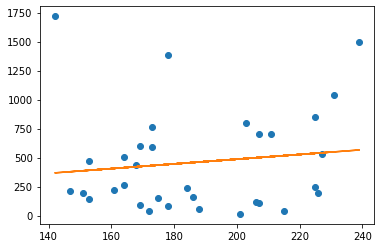

In [16]:
duration = 'Duration'
streams = 'Streams'

dfP.Duration = dfP.Duration.astype(int)
dfP.Streams = dfP.Streams.astype(int)

plt.plot(duration, streams, data = dfP, linestyle = 'none', marker = 'o')

m, b = np.polyfit(dfP[duration], dfP[streams], 1)

plt.plot(dfP[duration], m * dfP[duration] + b)


/var/folders/t_/twf8s6q91kn5v32pz5_9fglh0000gn/T/ipykernel_40195/2221295626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfR.Duration = dfR.Duration.astype(int)
/var/folders/t_/twf8s6q91kn5v32pz5_9fglh0000gn/T/ipykernel_40195/2221295626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfR.Streams = dfR.Streams.astype(int)


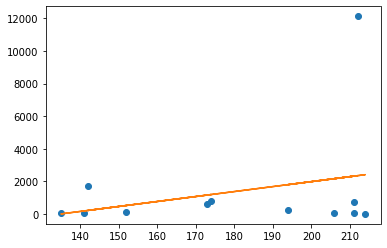

In [17]:
dfR.Duration = dfR.Duration.astype(int)
dfR.Streams = dfR.Streams.astype(int)
plt.plot(duration, streams, data = dfR, linestyle = 'none', marker = 'o')

m, b = np.polyfit(dfR[duration], dfR[streams], 1)

plt.plot(dfR[duration], m * dfR[duration] + b)

/var/folders/t_/twf8s6q91kn5v32pz5_9fglh0000gn/T/ipykernel_40195/3879606537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAI.Duration = dfAI.Duration.astype(int)
/var/folders/t_/twf8s6q91kn5v32pz5_9fglh0000gn/T/ipykernel_40195/3879606537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAI.Streams = dfAI.Streams.astype(int)


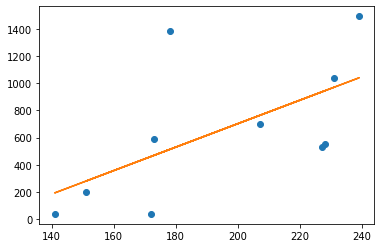

In [18]:
dfAI.Duration = dfAI.Duration.astype(int)
dfAI.Streams = dfAI.Streams.astype(int)

plt.plot(duration, streams, data = dfAI, linestyle = 'none', marker = 'o')

m, b = np.polyfit(dfAI[duration], dfAI[streams], 1)

plt.plot(dfAI[duration], m * dfAI[duration] + b)

##### There doesn't seem to be much of a difference between the genres in terms of their stream to duration correlation so we are going to take a look at the dataframe as a whole. 

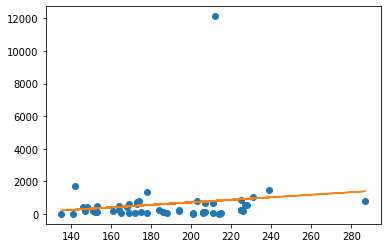

In [19]:
df.Duration = df.Duration.astype(int)
df.Streams = df.Streams.astype(int)

plt.plot(duration, streams, data = df, linestyle = 'none', marker = 'o')

m, b = np.polyfit(df[duration], df[streams], 1)

plt.plot(df[duration], m * df[duration] + b)

##### Based on these graphs we can conclude that there is a relationship between the duration of a song and 

### **Data Validation**

###### Null Hypothesis - there is no correlation between the length of a song and the number of streams it accumulates. 
##### Alternate Hypothesis - based on our last graph there seems to be a golden range of the length of songs for optimal streamability - between 160 seconds and around 240, had we collected more data from not just the latest hits, we might notice the graph take a more dumbbell shape as the durations of songs get longer. 


In [20]:
x = df[[streams]]
y = df[[duration]]
df.Duration = df.Duration.astype(int)
df.Streams = df.Streams.astype(int)

regression = sm.OLS(x, y)
results = regression.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                Streams   R-squared (uncentered):                   0.135
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              7.642
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                     0.00801
Time:                        13:48:17   Log-Likelihood:                         -442.20
No. Observations:                  50   AIC:                                      886.4
Df Residuals:                      49   BIC:                                      888.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### **Predictions**

In [21]:
df["Predicted Streams"] = 1
predictions = results.predict()
df['Predicted Streams'] = pd.Series(predictions)
df.drop(columns=["Explicit", "Artist", "Genre"], inplace=True)
df

,Title,Duration,Streams,Predicted Streams
0,As It Was,147,214,510.625262
1,Bad Habits,231,1040,802.411126
2,Bam Bam,206,116,715.570095
3,Better Days,161,217,559.256239
4,Bones,165,51,573.150804
5,Boyfriend,153,145,531.467109
6,Cold Heart,203,796,705.149171
7,Desesperados,225,280,781.569279
8,Easy On Me,225,851,781.569279
9,Enemy,173,592,600.939934


<AxesSubplot:title={'center':'Data Distribution for Actual Streams and Predicted Streams'}, xlabel='Predicted Streams', ylabel='Density'>

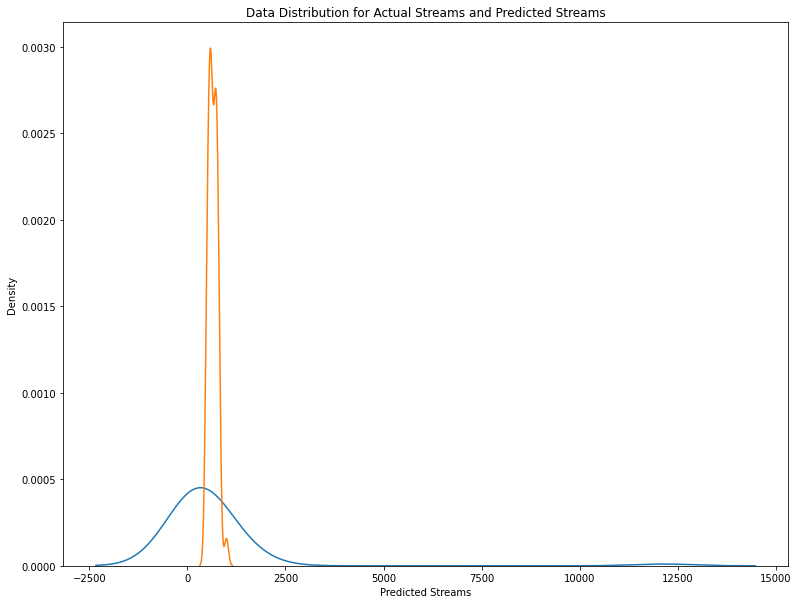

In [22]:
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(13,10))
plt.title('Data Distribution for Actual Streams and Predicted Streams')
sns.distplot(df['Streams'], hist=False, label="Actual", ax=ax)
sns.distplot(df['Predicted Streams'], hist=False, label="Linear Regression Predictions", ax=ax)

##### We can observe based on our graph here that the predictions (orange) are very dense compared to the actual streams (blue) which span a much broader ranger of stream numbers. 

<AxesSubplot:>

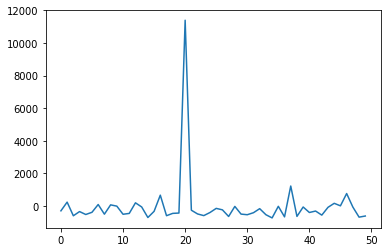

In [23]:
df['Residual'] = df['Streams'] - df['Predicted Streams']
df['Residual'].plot()

##### Accurate prediction models usually have residual graphs close to zero, but since we used regression we have a good amount of outliers. While our stream predictions didm't match up perfectly to the actual streams the each song accumulated for many of them it was in the right range, our data did not take into account an artists popularity or the amount of time the song had been available to stream two factors that could help make the numbers a little more accurate. 